CTR Dataset


The Story

A company wants to know the CTR (aka "Click Through Rate") in order to
identify whether spending their money on digital advertising is worth or not.
In general,

● a higher CTR indicates greater interest in a specific campaign,

● while a lower CTR may suggest the ad isn’t as relevant.

High CTRs are valuable because they demonstrate that more people are clicking through to the site.
Additionally, high CTRs help secure better ad placement at a lower cost on platforms like Google and Bing.
The dataset has 463291 records and 15 columns. Features are clear and target is "is_click" , 0 (No) , 1(Yes).


The CTR Dataset

Download from here: [link](https://drive.google.com/file/d/1YCLL0Rtc7i4PgpsjQEjgWBdF_T2yEkFi/view)

CTR Dataset: Data Card

● session_id - each record is a session, meaning each record is a different user "browse" over a given website. A session has attributes around the user, the ad, and the web page which the ad is presented within it

● datetime - indicates the session datetime

● user_id - a unique identifier for a given user. Each user may have or or multiple sessions

● product - product being advertised

● campaign_id - Identifier for the marketing campaign shown to the user

● webpage_id - Identifier for the webpage where the ad or campaign was displayed

● product_category_1 - Primary category of the product being advertised

● product_category_2 - Secondary category of the product, if applicable

● user_group_id - Identifier for the user segment or group to which the user belongs

● gender - user's gender, if applicable

● age_level - Age category of the user

● user_depth - User engagement level based on site interaction history

● city_development_index - Index representing the development level of the user's city

● var_1 - Additional variable (context-specific) with unknown attributes

● is_click - Binary indicator of whether the user clicked on the ad or not. Our label for this dataset!

CTR Dataset: EDA Guidelines questions

● How do user attributes correlate with click events?
*   Explore the relationship between demographic features (gender, age_level, city_development_index, user_group_id) and the likelihood of clicking.
*   Investigate whether certain user segments (e.g., age groups or genders) exhibit higher CTR.

● What is the impact of ad and campaign attributes on CTR?
*   Examine whether specific campaign_ids or product_category combinations have significantly different CTRs.
*   Analyze patterns based on webpage_id or the product being advertised to identify ad performance trends.

● How does temporal and session behavior affect CTR?
*   Analyze the distribution of clicks across time (datetime) to identify trends or peak engagement periods.
*   Investigate session-level attributes (user_depth) to see if higher engagement levels correlate with increased CTR.

● Come up with your own hypothesis about the CTR dataset
*   Define hypothesis, take the relevant data from this dataset, and investigate.
*   Showcase your conclusions in a storytelling manner, supported by visualizations and/or tables.


Impotant: Each analysis should be supported by appropriate tables and/or visualizations.
*   Tables should have clear headers, appropriate rounding, and meaningful labels/indices.
*   Visualizations must include clear titles, properly labeled axes, and legends where applicable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.dates as mdates
!pip install ydata-profiling
import ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9cba8d5aad4a709da8d0d348cdc8f3aa665d0ae7f1914da8f0abec299ae703cf
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [2]:
file_name = 'train_dataset_full.csv'  # the file is at the colab folder
df = pd.read_csv(file_name)

print("Dataset Info:")
print(df.info())
print("Dataset Top 5 rows:")
df.head()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389163 entries, 0 to 389162
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              384997 non-null  float64
 1   DateTime                385054 non-null  object 
 2   user_id                 385055 non-null  float64
 3   product                 384989 non-null  object 
 4   campaign_id             384975 non-null  float64
 5   webpage_id              385006 non-null  float64
 6   product_category_1      384962 non-null  float64
 7   product_category_2      80928 non-null   float64
 8   user_group_id           369844 non-null  float64
 9   gender                  369839 non-null  object 
 10  age_level               369854 non-null  float64
 11  user_depth              369841 non-null  float64
 12  city_development_index  281026 non-null  float64
 13  var_1                   385002 non-null  float64
 14  is_cli

session_id          DateTime    user_id product  campaign_id  webpage_id  \
0     98528.0  2017-07-04 16:42     7716.0       C     405490.0     60305.0   
1    589714.0  2017-07-07 07:40  1035283.0       I     118601.0     28529.0   
2    478652.0  2017-07-07 20:42    65994.0       H     359520.0     13787.0   
3     34536.0  2017-07-05 15:05    75976.0       H     405490.0     60305.0   
4     71863.0  2017-07-06 20:11   987498.0       C     405490.0     60305.0   

   product_category_1  product_category_2  user_group_id  gender  age_level  \
0                 3.0                 NaN            3.0    Male        3.0   
1                 4.0             82527.0           10.0  Female        4.0   
2                 4.0                 NaN            4.0    Male        4.0   
3                 3.0                 NaN            3.0    Male        3.0   
4                 3.0                 NaN            2.0    Male        2.0   

   user_depth  city_development_index  var_1  is_click  
0         3.0                     NaN    1.0       1.0  
1         3.0                     3.0    1.0       0.0  
2         3.0                     2.0    0.0       0.0  
3         3.0                     3.0    0.0       0.0  
4         3.0                     2.0    0.0       0.0

In [3]:
df.describe(include='all').T.sort_index()

count unique               top    freq  \
DateTime                  385054   8588  2017-07-04 20:39     142   
age_level               369854.0    NaN               NaN     NaN   
campaign_id             384975.0    NaN               NaN     NaN   
city_development_index  281026.0    NaN               NaN     NaN   
gender                    369839      2              Male  326805   
is_click                385031.0    NaN               NaN     NaN   
product                   384989     10                 C  136047   
product_category_1      384962.0    NaN               NaN     NaN   
product_category_2       80928.0    NaN               NaN     NaN   
session_id              384997.0    NaN               NaN     NaN   
user_depth              369841.0    NaN               NaN     NaN   
user_group_id           369844.0    NaN               NaN     NaN   
user_id                 385055.0    NaN               NaN     NaN   
var_1                   385002.0    NaN               NaN     NaN   
webpage_id              385006.0    NaN               NaN     NaN   

                                 mean            std      min       25%  \
DateTime                          NaN            NaN      NaN       NaN   
age_level                     2.78279       1.070502      0.0       2.0   
campaign_id             308535.060783  126514.409671  82320.0  118601.0   
city_development_index       2.557432       0.921094      1.0       2.0   
gender                            NaN            NaN      NaN       NaN   
is_click                     0.067576       0.251018      0.0       0.0   
product                           NaN            NaN      NaN       NaN   
product_category_1           3.071529       1.304761      1.0       2.0   
product_category_2      162826.298216   78709.449802  18595.0   82527.0   
session_id              285447.974478   168613.52914      2.0  137570.0   
user_depth                   2.878148       0.400521      1.0       3.0   
user_group_id                3.481108       2.417303      0.0       2.0   
user_id                 545818.689021  329535.100551      4.0  257015.5   
var_1                        0.421925       0.493867      0.0       0.0   
webpage_id               29709.145128   21549.658867   1734.0   13787.0   

                             50%       75%        max  
DateTime                     NaN       NaN        NaN  
age_level                    3.0       3.0        6.0  
campaign_id             359520.0  405490.0   414149.0  
city_development_index       2.0       3.0        4.0  
gender                       NaN       NaN        NaN  
is_click                     0.0       0.0        1.0  
product                      NaN       NaN        NaN  
product_category_1           3.0       4.0        5.0  
product_category_2      146115.0  254132.0   450184.0  
session_id              285447.0  435460.0   595812.0  
user_depth                   3.0       3.0        3.0  
user_group_id                3.0       4.0       12.0  
user_id                 531346.0  827809.0  1141729.0  
var_1                        0.0       1.0        1.0  
webpage_id               13787.0   53587.0    60305.0

In [4]:
# let's create datetime variable
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# add CTR column for likelihood of clicking
df['CTR'] = df['is_click'] / df['session_id']

# let's convert objects to numerical datatype
gender_mapping = {'Male': 0, 'Female': 1, 'Unknown': 2}  # placeholder for unknowf, if executing fefore the clening done
df['gender_encoded'] = df['gender'].map(gender_mapping)

df['product'].value_counts()
product_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9}
df['product_encoded'] = df['product'].map(product_mapping)

df.head()

session_id            DateTime    user_id product  campaign_id  webpage_id  \
0     98528.0 2017-07-04 16:42:00     7716.0       C     405490.0     60305.0   
1    589714.0 2017-07-07 07:40:00  1035283.0       I     118601.0     28529.0   
2    478652.0 2017-07-07 20:42:00    65994.0       H     359520.0     13787.0   
3     34536.0 2017-07-05 15:05:00    75976.0       H     405490.0     60305.0   
4     71863.0 2017-07-06 20:11:00   987498.0       C     405490.0     60305.0   

   product_category_1  product_category_2  user_group_id  gender  age_level  \
0                 3.0                 NaN            3.0    Male        3.0   
1                 4.0             82527.0           10.0  Female        4.0   
2                 4.0                 NaN            4.0    Male        4.0   
3                 3.0                 NaN            3.0    Male        3.0   
4                 3.0                 NaN            2.0    Male        2.0   

   user_depth  city_development_index  var_1  is_click      CTR  \
0         3.0                     NaN    1.0       1.0  0.00001   
1         3.0                     3.0    1.0       0.0  0.00000   
2         3.0                     2.0    0.0       0.0  0.00000   
3         3.0                     3.0    0.0       0.0  0.00000   
4         3.0                     2.0    0.0       0.0  0.00000   

   gender_encoded  product_encoded  
0             0.0              2.0  
1             1.0              8.0  
2             0.0              7.0  
3             0.0              7.0  
4             0.0              2.0

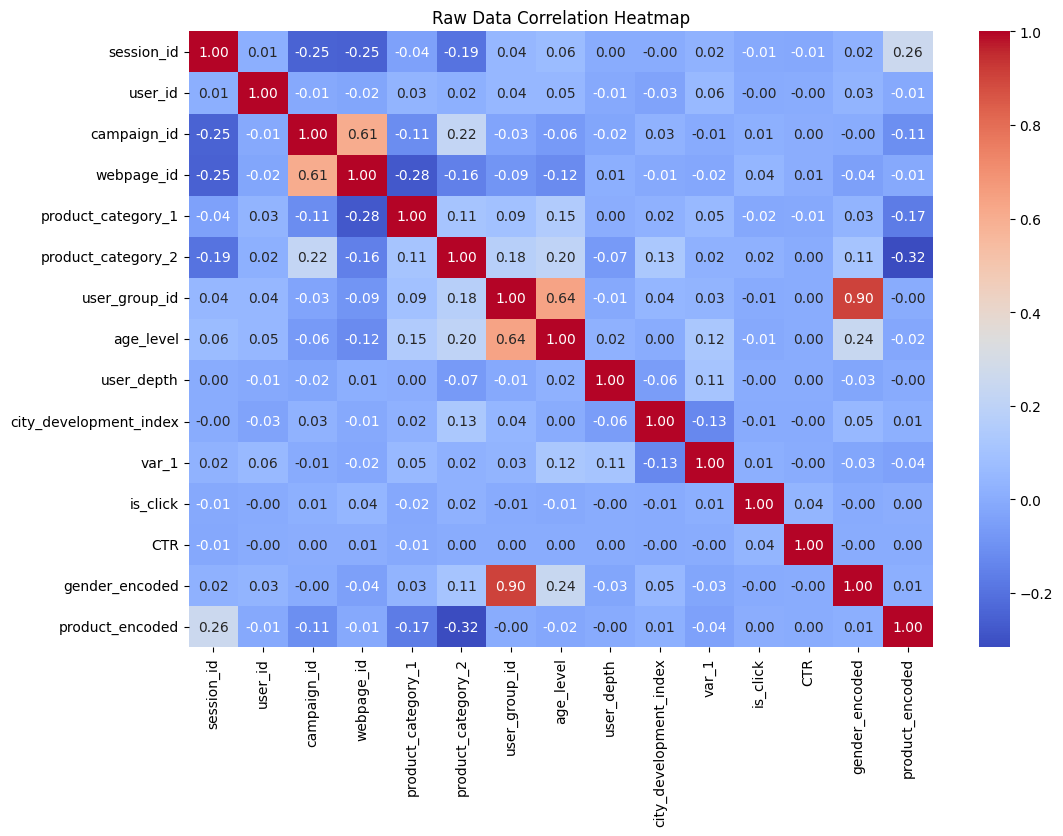

In [5]:
# correlations for numeric columns only - df
raw_correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(raw_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Raw Data Correlation Heatmap')
plt.show()

In [6]:
ydata_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

session_id                  4166
DateTime                    4109
user_id                     4108
product                     4174
campaign_id                 4188
webpage_id                  4157
product_category_1          4201
product_category_2        308235
user_group_id              19319
gender                     19324
age_level                  19309
user_depth                 19322
city_development_index    108137
var_1                       4161
is_click                    4132
CTR                         5558
gender_encoded             19324
product_encoded             4174
dtype: int64


In [8]:
# Calculate percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the results
print(missing_percentage)

session_id                 1.070503
DateTime                   1.055856
user_id                    1.055599
product                    1.072558
campaign_id                1.076156
webpage_id                 1.068190
product_category_1         1.079496
product_category_2        79.204601
user_group_id              4.964244
gender                     4.965529
age_level                  4.961674
user_depth                 4.965015
city_development_index    27.787071
var_1                      1.069218
is_click                   1.061766
CTR                        1.428193
gender_encoded             4.965529
product_encoded            1.072558
dtype: float64


In [9]:
# Lets inpute DateTime:

df['DateTime'] = df['DateTime'].ffill() # Forward fill
df['DateTime'] = df['DateTime'].bfill() # Backward fill

# Check again for missing values - exp. 0
print(df['DateTime'].isnull().sum())

print(df['DateTime'].min(), df['DateTime'].max())


0
2017-07-02 00:00:00 2017-07-07 23:59:00


In [10]:
# without imputation we are going to loose 5.83% of data (it's legit and can skipp the imputation)

df_copy2 = df.copy()
columns_to_drop2 = ['product_category_2', 'city_development_index'] # due to high missings
df_cleaned2 = df_copy2.drop(columns=columns_to_drop2)
df_cleaned2 = df_cleaned2.dropna()

initial_counts2 = len(df)  # Total rows in the original dataset
cleaned_count2 = len(df_cleaned2)

loss_percentage2 = ((initial_counts2 - cleaned_count2) / initial_counts2) * 100

print(f"Total rows in the original dataset: {initial_counts2}")
print(f"Total rows in the cleaned dataset: {cleaned_count2}")
print(f"Percentage of rows lost during cleaning: {loss_percentage2:.2f}%")


Total rows in the original dataset: 389163
Total rows in the cleaned dataset: 366475
Percentage of rows lost during cleaning: 5.83%


In [11]:
# create df_copy
df_copy = df.copy()

# let's clean
# drop values in columns with suspected unique identifiers (impossible impute)
df_cleaned = df_copy.dropna(subset=['session_id', 'user_id'])
df_cleaned.isnull().sum()


session_id                     0
DateTime                       0
user_id                        0
product                      654
campaign_id                  722
webpage_id                   702
product_category_1           701
product_category_2        303168
user_group_id              15780
gender                     15794
age_level                  15768
user_depth                 15800
city_development_index    104145
var_1                        670
is_click                     710
CTR                          710
gender_encoded             15794
product_encoded              654
dtype: int64

In [12]:
# ydata_profiling.ProfileReport(df): based on missing values correlation <0.1 it's ok to drop columns: product_category_2, city_development_index
# drop columns with high (>10%) frequency of missing values

columns_to_drop = ['product_category_2', 'city_development_index']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
df_cleaned.isnull().sum()

session_id                0
DateTime                  0
user_id                   0
product                 654
campaign_id             722
webpage_id              702
product_category_1      701
user_group_id         15780
gender                15794
age_level             15768
user_depth            15800
var_1                   670
is_click                710
CTR                     710
gender_encoded        15794
product_encoded         654
dtype: int64

In [13]:
# Imputation
df_cleaned['age_level'] = df_cleaned.groupby('product')['age_level'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)
)
df_cleaned['age_level'].isnull().sum()

654

In [14]:
df_cleaned['product_category_1'] = df_cleaned.groupby('product')['product_category_1'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)
)
df_cleaned['product_category_1'].isnull().sum()

654

In [15]:
df_cleaned['user_group_id'] = df_cleaned.groupby(['age_level'])['user_group_id'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)
)
df_cleaned['user_group_id'].isnull().sum()

654

In [16]:
df_cleaned['gender'] = df_cleaned.groupby(['user_group_id'])['gender'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)
)
df_cleaned['gender'].isnull().sum()

654

In [17]:
df_cleaned['gender_encoded'] = df_cleaned.groupby(['user_group_id'])['gender_encoded'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)
)
df_cleaned['gender_encoded'].isnull().sum()

654

In [18]:
df_cleaned['campaign_id'] = df_cleaned.groupby(['webpage_id'])['campaign_id'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)
)

df_cleaned['campaign_id'].isnull().sum()

702

In [19]:
df_cleaned['var_1'] = df_cleaned.groupby(['product'])['var_1'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)
)
df_cleaned['var_1'].isnull().sum()

654

In [20]:
df_cleaned['user_depth'] = df_cleaned.groupby(['campaign_id'])['user_depth'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)
)
df_cleaned['user_depth'].isnull().sum()

702

In [21]:
df_cleaned.isnull().sum()

session_id              0
DateTime                0
user_id                 0
product               654
campaign_id           702
webpage_id            702
product_category_1    654
user_group_id         654
gender                654
age_level             654
user_depth            702
var_1                 654
is_click              710
CTR                   710
gender_encoded        654
product_encoded       654
dtype: int64

In [22]:
# Now after imputation, let's drop the missing values

df_cleaned = df_cleaned.dropna()
df_cleaned.isnull().sum()

session_id            0
DateTime              0
user_id               0
product               0
campaign_id           0
webpage_id            0
product_category_1    0
user_group_id         0
gender                0
age_level             0
user_depth            0
var_1                 0
is_click              0
CTR                   0
gender_encoded        0
product_encoded       0
dtype: int64

In [23]:
# Let's see how much data we lost after cleaning and imputation?

initial_counts = len(df)  # Total rows in the original dataset
cleaned_count = len(df_cleaned)

loss_percentage = ((initial_counts - cleaned_count) / initial_counts) * 100

print(f"Total rows in the original dataset: {initial_counts}")
print(f"Total rows in the cleaned dataset: {cleaned_count}")
print(f"Percentage of rows lost during cleaning: {loss_percentage:.2f}%")

#################################################################

lost_values_percentage = ((df.count() - df_cleaned.count()) / df.count()) * 100

# Display the results
print("Lost values percentage:")
print(lost_values_percentage)


Total rows in the original dataset: 389163
Total rows in the cleaned dataset: 382284
Percentage of rows lost during cleaning: 1.77%
Lost values percentage:
CTR                       0.344365
DateTime                  1.767640
age_level                -3.360786
campaign_id               0.699006
city_development_index         NaN
gender                   -3.364978
gender_encoded           -3.364978
is_click                  0.713449
product                   0.702617
product_category_1        0.695653
product_category_2             NaN
product_encoded           0.702617
session_id                0.704681
user_depth               -3.364419
user_group_id            -3.363580
user_id                   0.719637
var_1                     0.705970
webpage_id                0.707002
dtype: float64


In [24]:
print("Cleanded Dataset Info:")
print(df_cleaned.info())
print("Summary Statistics:")
df_cleaned.describe(include='all').T.sort_index()
# top: mode value in the column
# freq: count of the mode value (top)


Cleanded Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 382284 entries, 0 to 389162
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   session_id          382284 non-null  float64       
 1   DateTime            382284 non-null  datetime64[ns]
 2   user_id             382284 non-null  float64       
 3   product             382284 non-null  object        
 4   campaign_id         382284 non-null  float64       
 5   webpage_id          382284 non-null  float64       
 6   product_category_1  382284 non-null  float64       
 7   user_group_id       382284 non-null  float64       
 8   gender              382284 non-null  object        
 9   age_level           382284 non-null  float64       
 10  user_depth          382284 non-null  float64       
 11  var_1               382284 non-null  float64       
 12  is_click            382284 non-null  float64       
 13  CTR        

count unique   top    freq  \
CTR                 382284.0    NaN   NaN     NaN   
DateTime              382284    NaN   NaN     NaN   
age_level           382284.0    NaN   NaN     NaN   
campaign_id         382284.0    NaN   NaN     NaN   
gender                382284      2  Male  339533   
gender_encoded      382284.0    NaN   NaN     NaN   
is_click            382284.0    NaN   NaN     NaN   
product               382284     10     C  135095   
product_category_1  382284.0    NaN   NaN     NaN   
product_encoded     382284.0    NaN   NaN     NaN   
session_id          382284.0    NaN   NaN     NaN   
user_depth          382284.0    NaN   NaN     NaN   
user_group_id       382284.0    NaN   NaN     NaN   
user_id             382284.0    NaN   NaN     NaN   
var_1               382284.0    NaN   NaN     NaN   
webpage_id          382284.0    NaN   NaN     NaN   

                                             mean                  min  \
CTR                                      0.000001                  0.0   
DateTime            2017-07-05 00:31:47.937816064  2017-07-02 00:00:00   
age_level                                2.780794                  0.0   
campaign_id                         308523.633859              82320.0   
gender                                        NaN                  NaN   
gender_encoded                            0.11183                  0.0   
is_click                                 0.067578                  0.0   
product                                       NaN                  NaN   
product_category_1                       3.071248                  1.0   
product_encoded                           4.34461                  0.0   
session_id                          285449.321784                  2.0   
user_depth                               2.882977                  1.0   
user_group_id                            3.451235                  0.0   
user_id                              545940.77545                  4.0   
var_1                                    0.421726                  0.0   
webpage_id                           29708.714791               1734.0   

                                    25%                  50%  \
CTR                                 0.0                  0.0   
DateTime            2017-07-03 11:57:00  2017-07-04 21:57:00   
age_level                           2.0                  3.0   
campaign_id                    118601.0             359520.0   
gender                              NaN                  NaN   
gender_encoded                      0.0                  0.0   
is_click                            0.0                  0.0   
product                             NaN                  NaN   
product_category_1                  2.0                  3.0   
product_encoded                     2.0                  3.0   
session_id                    137560.75             285456.5   
user_depth                          3.0                  3.0   
user_group_id                       2.0                  3.0   
user_id                       257182.75             531454.0   
var_1                               0.0                  0.0   
webpage_id                      13787.0              13787.0   

                                    75%                  max            std  
CTR                                 0.0             0.071429       0.000118  
DateTime            2017-07-06 12:35:00  2017-07-07 23:59:00            NaN  
age_level                           3.0                  6.0       1.052661  
campaign_id                    405490.0             414149.0  126525.303445  
gender                              NaN                  NaN            NaN  
gender_encoded                      0.0                  1.0       0.315158  
is_click                            0.0                  1.0       0.251021  
product                             NaN                  NaN            NaN  
product_category_1                  4.0                  5.0       1.30

In [25]:
# Pairplot
#sns.pairplot(df_cleaned, diag_kind='kde')
#plt.show()


Value Counts for Target Variable (is_click):
is_click
0.0    356450
1.0     25834
Name: count, dtype: int64


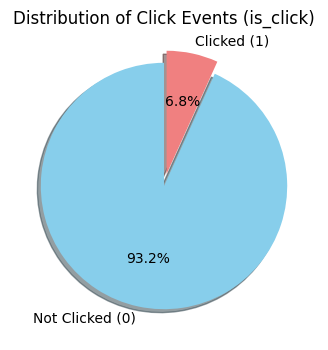

In [26]:
# Variable 'is_click'
print("\nValue Counts for Target Variable (is_click):")
is_click_counts = df_cleaned['is_click'].value_counts()
print(is_click_counts)

plt.figure(figsize=(4, 4))
is_click_counts.plot.pie(
    autopct='%1.1f%%',
    labels=['Not Clicked (0)', 'Clicked (1)'],
    colors=['skyblue', 'lightcoral'],
    startangle=90,
    explode=(0, 0.1),
    shadow=True
)
plt.title("Distribution of Click Events (is_click)")
plt.ylabel("")
plt.show()

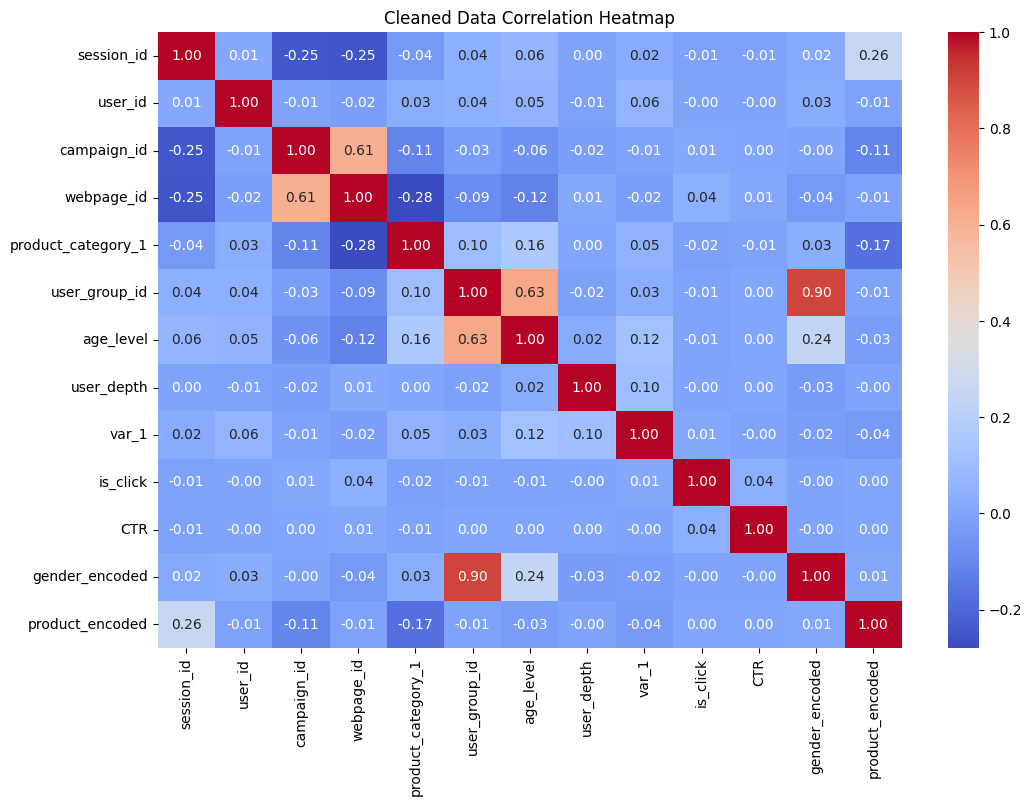

In [27]:
# correlations for numeric columns only - df_cleaned
correlation_matrix = df_cleaned.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Cleaned Data Correlation Heatmap')
plt.show()

● How do user attributes correlate with click events?
*   Explore the relationship between demographic features (gender, age_level, city_development_index, user_group_id) and the likelihood of clicking.
*   Investigate whether certain user segments (e.g., age groups or genders) exhibit higher CTR.

Proportions: gender
Male      88.816953
Female    11.183047
Name: proportion, dtype: float64
        total_clicks  total_sessions       CTR
gender                                        
Female        2754.0           42751  0.064420
Male         23080.0          339533  0.067976


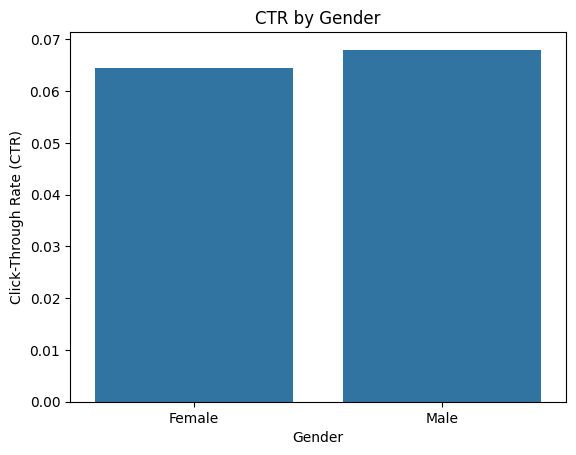

In [28]:
gender_proportions = df_cleaned['gender'].value_counts(normalize=True) * 100
print("Proportions:", gender_proportions)
# The data is imbalanced, low female proportion
# CTR mormalizes the data by populating rate

# Calculate CTR for gender
ctr_by_gender = df_cleaned.groupby('gender').agg(
    total_clicks=('is_click', 'sum'),  # Sum of clicks
    total_sessions=('is_click', 'count')  # Count of total sessions
)
ctr_by_gender['CTR'] = ctr_by_gender['total_clicks'] / ctr_by_gender['total_sessions']

# Display the result
print(ctr_by_gender)

# Plot
sns.barplot(x=ctr_by_gender.index, y=ctr_by_gender['CTR'])
plt.title('CTR by Gender')
plt.ylabel('Click-Through Rate (CTR)')
plt.xlabel('Gender')
plt.show()

# Slightly higher CTR for Males

Proportions: age_level
0.0     0.032960
1.0     9.342792
2.0    32.052349
3.0    37.533614
4.0    13.771437
5.0     6.655785
6.0     0.611064
Name: proportion, dtype: float64
           total_clicks  total_sessions       CTR
age_level                                        
0.0                14.0             126  0.111111
1.0              2655.0           35716  0.074336
2.0              8686.0          122531  0.070888
3.0              9312.0          143485  0.064899
4.0              3072.0           52646  0.058352
5.0              1906.0           25444  0.074910
6.0               189.0            2336  0.080908


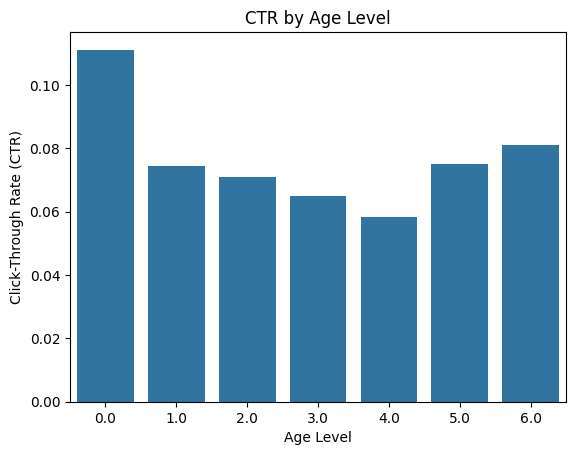

In [29]:
age_level_proportions = df_cleaned['age_level'].value_counts(normalize=True) * 100
print("Proportions:", age_level_proportions.sort_index())
# The dataset is highly imbalanced across age_level values,
# Overrepresentation of 2,3,4 age_levels
# Extreme underrepresentation of 0,6 age_levels

# Group by age_level and calculate total clicks, sessions, and CTR
ctr_by_age_level = df_cleaned.groupby('age_level').agg(
    total_clicks=('is_click', 'sum'),  # Total clicks
    total_sessions=('is_click', 'count')  # Total sessions
)
ctr_by_age_level['CTR'] = ctr_by_age_level['total_clicks'] / ctr_by_age_level['total_sessions']

# Print the result
print(ctr_by_age_level)

# Plot CTR by age_level
sns.barplot(x=ctr_by_age_level.index, y=ctr_by_age_level['CTR'])
plt.title('CTR by Age Level')
plt.ylabel('Click-Through Rate (CTR)')
plt.xlabel('Age Level')
plt.show()

# The underrepresented age_level 0 has the highest CTR, same for age_level 6
# The CTR between 0 and 1 significantly different (both underrepresented)
# The CTR gradualy decreases for the dominating age_levels 2,3,4, with minCTR age_level 4


Proportions: user_group_id
0.0      0.032960
1.0      9.032813
2.0     30.705967
3.0     33.145515
4.0     10.790407
5.0      4.736008
6.0      0.383746
7.0      0.312595
8.0      1.347951
9.0      4.374235
10.0     2.985477
11.0     1.924485
12.0     0.227841
Name: proportion, dtype: float64
               total_clicks  total_sessions       CTR
user_group_id                                        
0.0                    14.0             126  0.111111
1.0                  2578.0           34531  0.074658
2.0                  8347.0          117384  0.071108
3.0                  8254.0          126710  0.065141
4.0                  2445.0           41250  0.059273
5.0                  1329.0           18105  0.073405
6.0                   116.0            1467  0.079073
7.0                    77.0            1195  0.064435
8.0                   339.0            5153  0.065787
9.0                  1055.0           16722  0.063091
10.0                  628.0           11413  0.055025
11.0

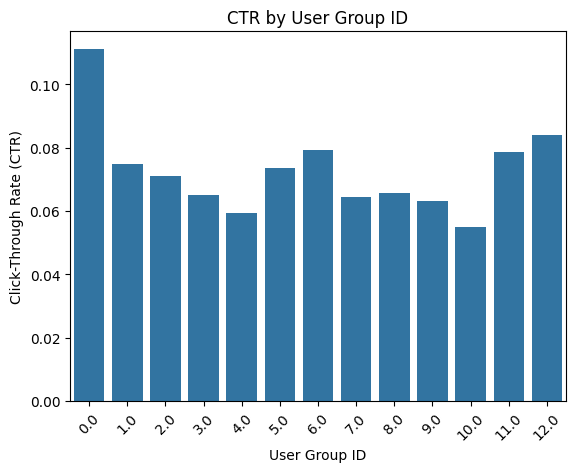

'\nuser_group_id 3 and 2 have the highest proportions 33.15%, 30.7%\nuser_group_id 0,6,7,12 extremely rare (< 0.5%)\n\nthe rare user_group_id 0,6,12 have the highest CTR\nlowest CTR for user_group_id 10,3,4 (3 among the highly representeg groups)\n\nOverall trend - smaller user_group_ids -> higher CTR, larger user_group_ids -> lower CTR\n'

In [30]:
user_group_id_proportions = df_cleaned['user_group_id'].value_counts(normalize=True) * 100
print("Proportions:", user_group_id_proportions.sort_index())

# Group by user_group_id and calculate total clicks, sessions, and CTR
ctr_by_user_group = df_cleaned.groupby('user_group_id').agg(
    total_clicks=('is_click', 'sum'),  # Total clicks
    total_sessions=('is_click', 'count')  # Total sessions
)
ctr_by_user_group['CTR'] = ctr_by_user_group['total_clicks'] / ctr_by_user_group['total_sessions']

# Print the result
print(ctr_by_user_group)

# Plot CTR by user_group_id
sns.barplot(x=ctr_by_user_group.index, y=ctr_by_user_group['CTR'])
plt.title('CTR by User Group ID')
plt.ylabel('Click-Through Rate (CTR)')
plt.xlabel('User Group ID')
plt.xticks(rotation=45)
plt.show()

'''
user_group_id 3 and 2 have the highest proportions 33.15%, 30.7%
user_group_id 0,6,7,12 extremely rare (< 0.5%)

the rare user_group_id 0,6,12 have the highest CTR
lowest CTR for user_group_id 10,3,4 (3 among the highly representeg groups)

Overall trend - smaller user_group_ids -> higher CTR, larger user_group_ids -> lower CTR
'''

What is the impact of ad and campaign attributes on CTR?
*   Examine whether specific campaign_ids or product_category combinations have significantly different CTRs.
*   Analyze patterns based on webpage_id or the product being advertised to identify ad performance trends.

Proportions: campaign_id
82320.0      6.029026
98970.0      7.549623
105960.0     5.564711
118601.0     7.660535
359520.0    23.296816
360936.0    11.198742
396664.0     5.379247
404347.0     6.229662
405490.0    20.751849
414149.0     6.339789
Name: proportion, dtype: float64
             total_clicks  total_sessions       CTR
campaign_id                                        
82320.0            1434.0           23048  0.062218
98970.0            2178.0           28861  0.075465
105960.0           1450.0           21273  0.068162
118601.0           1551.0           29285  0.052962
359520.0           5282.0           89060  0.059308
360936.0           1934.0           42811  0.045175
396664.0           1508.0           20564  0.073332
404347.0           1826.0           23815  0.076674
405490.0           7240.0           79331  0.091263
414149.0           1431.0           24236  0.059044


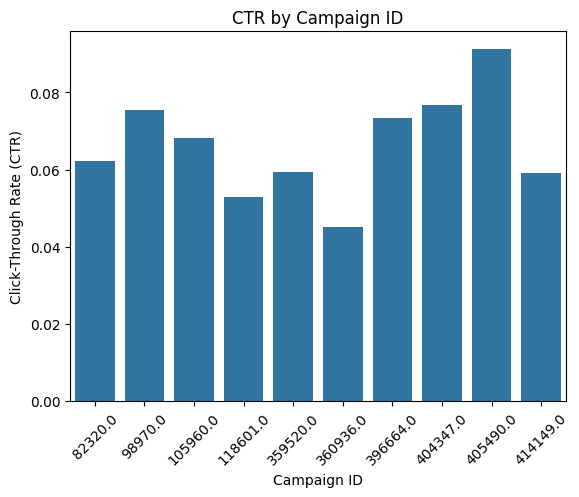

'\nCampaigns 359520.0 (23.30%) and 405490.0 (20.75%) account for nearly half of all sessions, indicating they are the most frequent campaigns in the dataset,\nDespite of the max frequency, 359520.0 demonstrated moderate CTR (5.93%).\n\nThe popular campaign 405490.0 has the highest CTR at 9.13%, making it the most effective campaign in driving user clicks.\n\nCampaigns 404347.0 (7.67%) and 396664.0 (7.33%) also exhibit strong CTRs.\nCampaign 360936.0 has the lowest CTR at 4.52%, indicating relatively poor performance compared to others.\n\n'

In [31]:
campaign_id_proportions = df_cleaned['campaign_id'].value_counts(normalize=True) * 100
print("Proportions:", campaign_id_proportions.sort_index())


# Group by campaign_id and calculate CTR
ctr_by_campaign = df_cleaned.groupby('campaign_id').agg(
    total_clicks=('is_click', 'sum'),  # Total clicks
    total_sessions=('is_click', 'count')  # Total sessions
)
ctr_by_campaign['CTR'] = ctr_by_campaign['total_clicks'] / ctr_by_campaign['total_sessions']

# Print the result
print(ctr_by_campaign)

# Plot CTR by campaign_id
sns.barplot(x=ctr_by_campaign.index, y=ctr_by_campaign['CTR'])
plt.title('CTR by Campaign ID')
plt.ylabel('Click-Through Rate (CTR)')
plt.xlabel('Campaign ID')
plt.xticks(rotation=45)
plt.show()

'''
Campaigns 359520.0 (23.30%) and 405490.0 (20.75%) account for nearly half of all sessions, indicating they are the most frequent campaigns in the dataset,
Despite of the max frequency, 359520.0 demonstrated moderate CTR (5.93%).

The popular campaign 405490.0 has the highest CTR at 9.13%, making it the most effective campaign in driving user clicks.

Campaigns 404347.0 (7.67%) and 396664.0 (7.33%) also exhibit strong CTRs.
Campaign 360936.0 has the lowest CTR at 4.52%, indicating relatively poor performance compared to others.

'''

Proportions by Product Category:
product_category_1
1.0    17.541932
2.0    14.960867
3.0    24.552427
4.0    28.720009
5.0    14.224765
Name: proportion, dtype: float64
                    total_clicks  total_sessions       CTR
product_category_1                                        
1.0                       4755.0           67060  0.070907
2.0                       3527.0           57193  0.061668
3.0                       7858.0           93860  0.083720
4.0                       6507.0          109792  0.059267
5.0                       3187.0           54379  0.058607


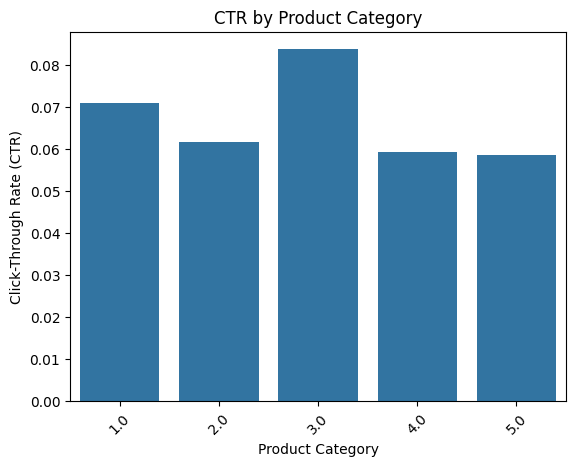

'\nProportions:\nCategory 4.0 (28.72%) and Category 3.0 (24.55%) are the most commonly advertised product categories, comprising more than 50% of all sessions.\nCategory 5.0 has the lowest proportion (14.22%).\n\nCTR:\nCategory 3.0 has the highest CTR (8.37%), indicating the strongest ad performance in terms of user engagement.\nCategory 1.0 also performs well with a CTR of 7.09%.\nCategories 2.0, 4.0, and 5.0 exhibit lower CTRs, hovering around 5.86% to 6.16%, suggesting weaker user interaction.\n\nTop Performers:\nCategory 3.0 stands out as the best-performing category in terms of CTR, indicating strong user interest and engagement.\nCategory 1.0 is another strong performer, balancing both a good CTR and a moderate session count.\n\nLow Performers:\nCategory 4.0 attracts the most sessions but has one of the lowest CTRs, highlighting a possible mismatch between the ad content and user interest.\nCategory 5.0 has the lowest CTR (5.86%) and one of the lowest session counts, suggesting l

In [32]:
# Product Category Proportions
product_category_proportions = df_cleaned['product_category_1'].value_counts(normalize=True) * 100
print("Proportions by Product Category:")
print(product_category_proportions.sort_index())

# Group by product_category_1 and calculate CTR
ctr_by_product_category = df_cleaned.groupby('product_category_1').agg(
    total_clicks=('is_click', 'sum'),
    total_sessions=('is_click', 'count')
)
ctr_by_product_category['CTR'] = ctr_by_product_category['total_clicks'] / ctr_by_product_category['total_sessions']

# Print the result
print(ctr_by_product_category)

# Plot CTR by product_category_1
sns.barplot(x=ctr_by_product_category.index, y=ctr_by_product_category['CTR'])
plt.title('CTR by Product Category')
plt.ylabel('Click-Through Rate (CTR)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

'''
Proportions:
Category 4.0 (28.72%) and Category 3.0 (24.55%) are the most commonly advertised product categories, comprising more than 50% of all sessions.
Category 5.0 has the lowest proportion (14.22%).

CTR:
Category 3.0 has the highest CTR (8.37%), indicating the strongest ad performance in terms of user engagement.
Category 1.0 also performs well with a CTR of 7.09%.
Categories 2.0, 4.0, and 5.0 exhibit lower CTRs, hovering around 5.86% to 6.16%, suggesting weaker user interaction.

Top Performers:
Category 3.0 stands out as the best-performing category in terms of CTR, indicating strong user interest and engagement.
Category 1.0 is another strong performer, balancing both a good CTR and a moderate session count.

Low Performers:
Category 4.0 attracts the most sessions but has one of the lowest CTRs, highlighting a possible mismatch between the ad content and user interest.
Category 5.0 has the lowest CTR (5.86%) and one of the lowest session counts, suggesting limited effectiveness.

'''


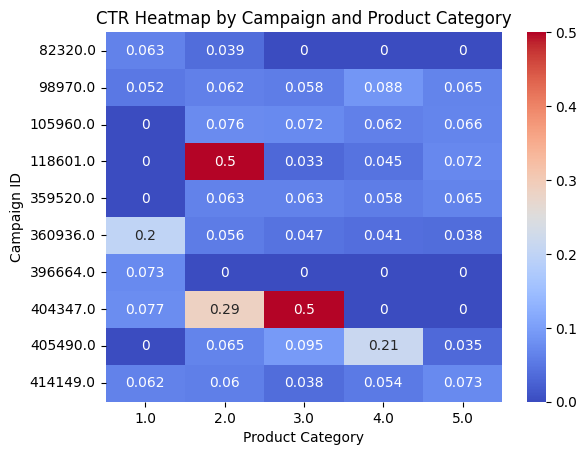

'\nEach cell represents the CTR for a specific campaign and product category pair.\n\nInsights:\n\nCampaign 118601 with product category 2 and cmapign 404347 with product category 3 have a very high CTR (0.5).\nCampaign 396664 has only one active product category, as many cells in their row with CTR = 0.\nProduct category 2 generally shows slightly higher CTR across campaigns compared to other categories.\n'

In [33]:
# Group by campaign_id and product_category_1
ctr_by_combination = df_cleaned.groupby(['campaign_id', 'product_category_1']).agg(
    total_clicks=('is_click', 'sum'),
    total_sessions=('is_click', 'count')
)
ctr_by_combination['CTR'] = ctr_by_combination['total_clicks'] / ctr_by_combination['total_sessions']

# Pivot table for heatmap
pivot_ctr = ctr_by_combination.reset_index().pivot(
    index='campaign_id',
    columns='product_category_1',
    values='CTR'
).fillna(0)

# Heatmap
sns.heatmap(pivot_ctr, annot=True, cmap='coolwarm')
plt.title('CTR Heatmap by Campaign and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Campaign ID')
plt.show()

'''
Each cell represents the CTR for a specific campaign and product category pair.

Insights:

Campaign 118601 with product category 2 and cmapign 404347 with product category 3 have a very high CTR (0.5).
Campaign 396664 has only one active product category, as many cells in their row with CTR = 0.
Product category 2 generally shows slightly higher CTR across campaigns compared to other categories.
'''


In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as ols

# Fit the model with interaction
model = ols.ols('is_click ~ C(campaign_id) * C(product_category_1)', data=df_cleaned).fit()

# ANOVA Table to test significance of main effects and interaction
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                            sum_sq        df           F  \
C(campaign_id)                           57.208429       9.0  101.335634   
C(product_category_1)                     3.716966       4.0   14.814032   
C(campaign_id):C(product_category_1)     25.906000      36.0   11.472090   
Residual                              23976.687315  382238.0         NaN   

                                             PR(>F)  
C(campaign_id)                        9.194643e-149  
C(product_category_1)                  3.686354e-07  
C(campaign_id):C(product_category_1)   2.780404e-60  
Residual                                        NaN  


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 7
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 36, but rank is 33
  warnings.warn('covariance of constraints does not have full '


Proportions: webpage_id
1734.0      6.029026
6970.0      7.549623
11085.0     5.564711
13787.0    34.495558
28529.0     7.660535
45962.0     6.339789
51181.0     5.379247
53587.0     6.229662
60305.0    20.751849
Name: proportion, dtype: float64
            total_clicks  total_sessions       CTR
webpage_id                                        
1734.0            1434.0           23048  0.062218
6970.0            2178.0           28861  0.075465
11085.0           1450.0           21273  0.068162
13787.0           7216.0          131871  0.054720
28529.0           1551.0           29285  0.052962
45962.0           1431.0           24236  0.059044
51181.0           1508.0           20564  0.073332
53587.0           1826.0           23815  0.076674
60305.0           7240.0           79331  0.091263


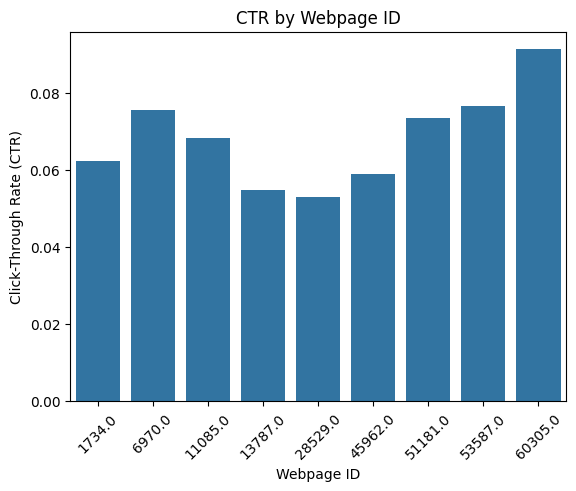

'\nProportions & CTR:\n60305.0 has the highest CTR (9.1%) but accounts for only 20.75% of total sessions.\n13787.0 has the highest session proportion (34.5%) but a relatively low CTR (5.5%).\n'

In [35]:
webpage_id_proportions = df_cleaned['webpage_id'].value_counts(normalize=True) * 100
print("Proportions:", webpage_id_proportions.sort_index())

# Group by webpage_id and calculate CTR
ctr_by_webpage_id = df_cleaned.groupby('webpage_id').agg(
    total_clicks=('is_click', 'sum'),  # Total clicks
    total_sessions=('is_click', 'count')  # Total sessions
)
ctr_by_webpage_id['CTR'] = ctr_by_webpage_id['total_clicks'] / ctr_by_webpage_id['total_sessions']

# Print the result
print(ctr_by_webpage_id)

# Plot CTR by webpage_id
sns.barplot(x=ctr_by_webpage_id.index, y=ctr_by_webpage_id['CTR'])
plt.title('CTR by Webpage ID')
plt.ylabel('Click-Through Rate (CTR)')
plt.xlabel('Webpage ID')
plt.xticks(rotation=45)
plt.show()

'''
Proportions & CTR:
60305.0 has the highest CTR (9.1%) but accounts for only 20.75% of total sessions.
13787.0 has the highest session proportion (34.5%) but a relatively low CTR (5.5%).
'''

How does temporal and session behavior affect CTR?
*   Analyze the distribution of clicks across time (datetime) to identify trends or peak engagement periods.
*   Investigate session-level attributes (user_depth) to see if higher engagement levels correlate with increased CTR.



In [36]:
import pytz
print(df_cleaned['DateTime'].isnull().sum())


0


In [37]:
# Check time zone of DateTime
print(df_cleaned['DateTime'].dt.tz) #None
df_cleaned['DateTime_UTC'] = df_cleaned['DateTime'].dt.tz_localize('UTC')
print(df_cleaned['DateTime_UTC'].dt.tz)


None
UTC


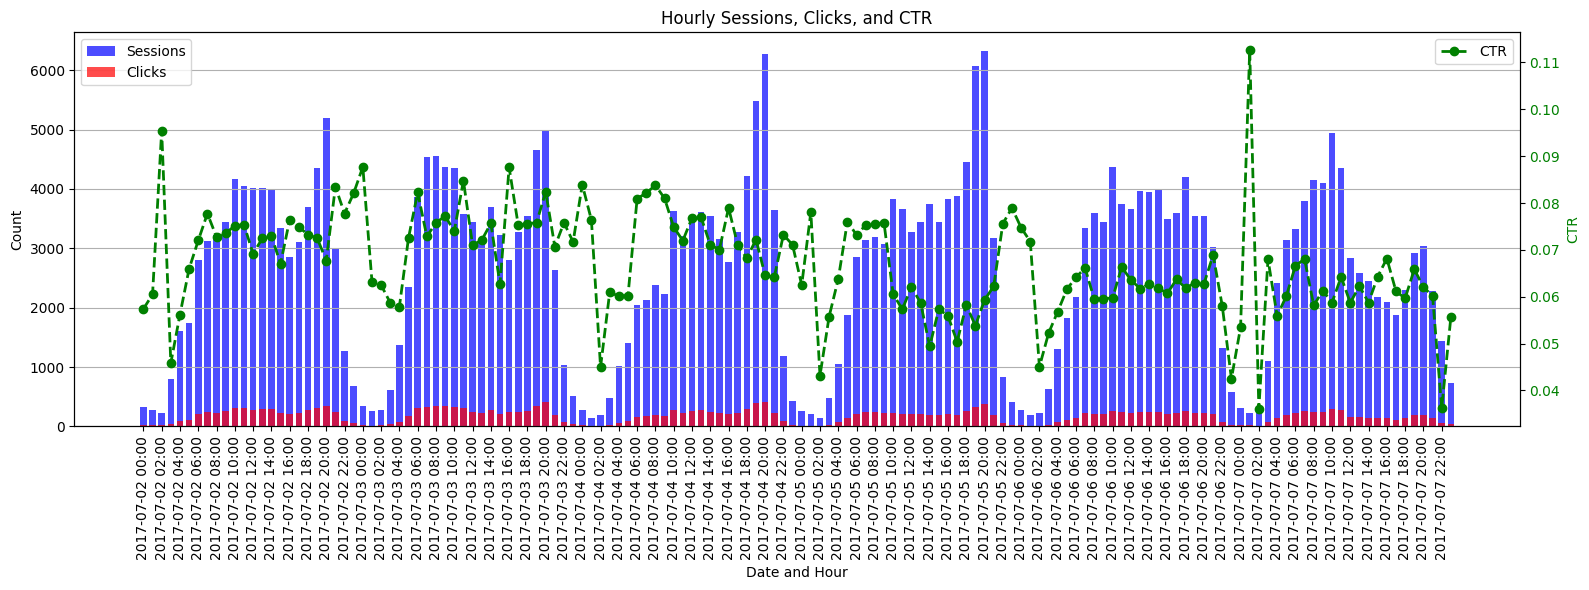

'\nDaytime Activity: Most user interactions, including sessions and clicks, occur during the day, suggesting higher engagement during working hours or leisure time.\nCTR Variability: CTR spikes during certain off-peak hours could suggest effective advertising strategies or targeted campaigns.\nTemporal Trends: Understanding these temporal patterns can help optimize campaign scheduling to align with user engagement peaks for better performance.\n'

In [38]:
# Aggregate data by hourly intervals using 'DateTime'
hourly_data = df_cleaned.set_index('DateTime_UTC').groupby(pd.Grouper(freq='h')).agg(
    total_sessions=('session_id', 'count'),  # Count of sessions
    total_clicks=('is_click', 'sum')        # Sum of clicks
).reset_index()

hourly_data['ctr'] = hourly_data['total_clicks'] / hourly_data['total_sessions']

# Plot sessions and clicks as bar charts
fig, ax1 = plt.subplots(figsize=(16, 6))

# Bar chart for total sessions and clicks
ax1.bar(hourly_data['DateTime_UTC'], hourly_data['total_sessions'], label='Sessions', alpha=0.7, color='blue', width=0.03)
ax1.bar(hourly_data['DateTime_UTC'], hourly_data['total_clicks'], label='Clicks', alpha=0.7, color='red', width=0.03)

# Configure primary y-axis (for sessions and clicks)
ax1.set_xlabel('Date and Hour')
ax1.set_ylabel('Count', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.set_xticks(hourly_data['DateTime_UTC'][::2])  # Reduce x-tick density for better readability
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Add hours to x-axis labels
ax1.tick_params(axis='x', rotation=90)
ax1.grid(axis='y')

# Add CTR to a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(hourly_data['DateTime_UTC'], hourly_data['ctr'], label='CTR', color='green', linestyle='--', marker='o', linewidth=2)
ax2.set_ylabel('CTR', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Title and layout
plt.title('Hourly Sessions, Clicks, and CTR')
plt.tight_layout()
plt.show()

'''
Daytime Activity: Most user interactions, including sessions and clicks, occur during the day, suggesting higher engagement during working hours or leisure time.
CTR Variability: CTR spikes during certain off-peak hours could suggest effective advertising strategies or targeted campaigns.
Temporal Trends: Understanding these temporal patterns can help optimize campaign scheduling to align with user engagement peaks for better performance.
'''

Proportions: user_depth
1.0     2.565109
2.0     6.572077
3.0    90.862814
Name: proportion, dtype: float64
            total_clicks  total_sessions       CTR
user_depth                                        
1.0                715.0            9806  0.072915
2.0               1603.0           25124  0.063804
3.0              23516.0          347354  0.067700


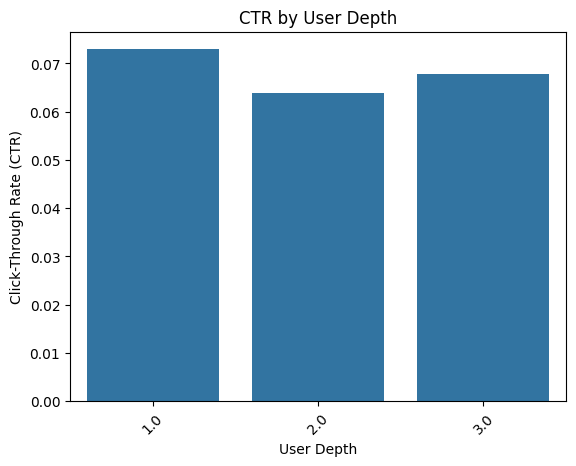

'\nUsers at Depth 1.0 are likely to engage more with clicks relative to their sessions, possibly due to curiosity or lack of familiarity with the website.\nDepth 3.0 users dominate in volume and have a decent CTR, showcasing their importance in overall CTR performance.\nDepth 2.0 users may need targeted campaigns to improve engagement.\n'

In [39]:
user_depth_proportions = df_cleaned['user_depth'].value_counts(normalize=True) * 100
print("Proportions:", user_depth_proportions.sort_index())

# Group by user_depth and calculate CTR
ctr_by_user_depth = df_cleaned.groupby('user_depth').agg(
    total_clicks=('is_click', 'sum'),  # Total clicks
    total_sessions=('is_click', 'count')  # Total sessions
)
ctr_by_user_depth['CTR'] = ctr_by_user_depth['total_clicks'] / ctr_by_user_depth['total_sessions']

# Print the result
print(ctr_by_user_depth)

# Plot CTR by user_depth
sns.barplot(x=ctr_by_user_depth.index, y=ctr_by_user_depth['CTR'])
plt.title('CTR by User Depth')
plt.ylabel('Click-Through Rate (CTR)')
plt.xlabel('User Depth')
plt.xticks(rotation=45)
plt.show()

'''
Users at Depth 1.0 are likely to engage more with clicks relative to their sessions, possibly due to curiosity or lack of familiarity with the website.
Depth 3.0 users dominate in volume and have a decent CTR, showcasing their importance in overall CTR performance.
Depth 2.0 users may need targeted campaigns to improve engagement.
'''

Come up with your own hypothesis about the CTR dataset
*   Define hypothesis, take the relevant data from this dataset, and investigate.
*   Showcase your conclusions in a storytelling manner, supported by visualizations and/or tables.

Hypothesis: User group ID significantly influences CTR, and this effect varies between genders.

    gender  user_group_id  total_clicks  total_sessions       CTR
0   Female            0.0           1.0              24  0.041667
1   Female            2.0           2.0               4  0.500000
2   Female            3.0           0.0               8  0.000000
3   Female            4.0           0.0               2  0.000000
4   Female            5.0           0.0               1  0.000000
5   Female            6.0           0.0               1  0.000000
6   Female            7.0          77.0            1195  0.064435
7   Female            8.0         339.0            5153  0.065787
8   Female            9.0        1055.0           16722  0.063091
9   Female           10.0         628.0           11413  0.055025
10  Female           11.0         579.0            7357  0.078701
11  Female           12.0          73.0             871  0.083812
12    Male            0.0          13.0             102  0.127451
13    Male            1.0        2578.0           34531  0.074658
14    Male

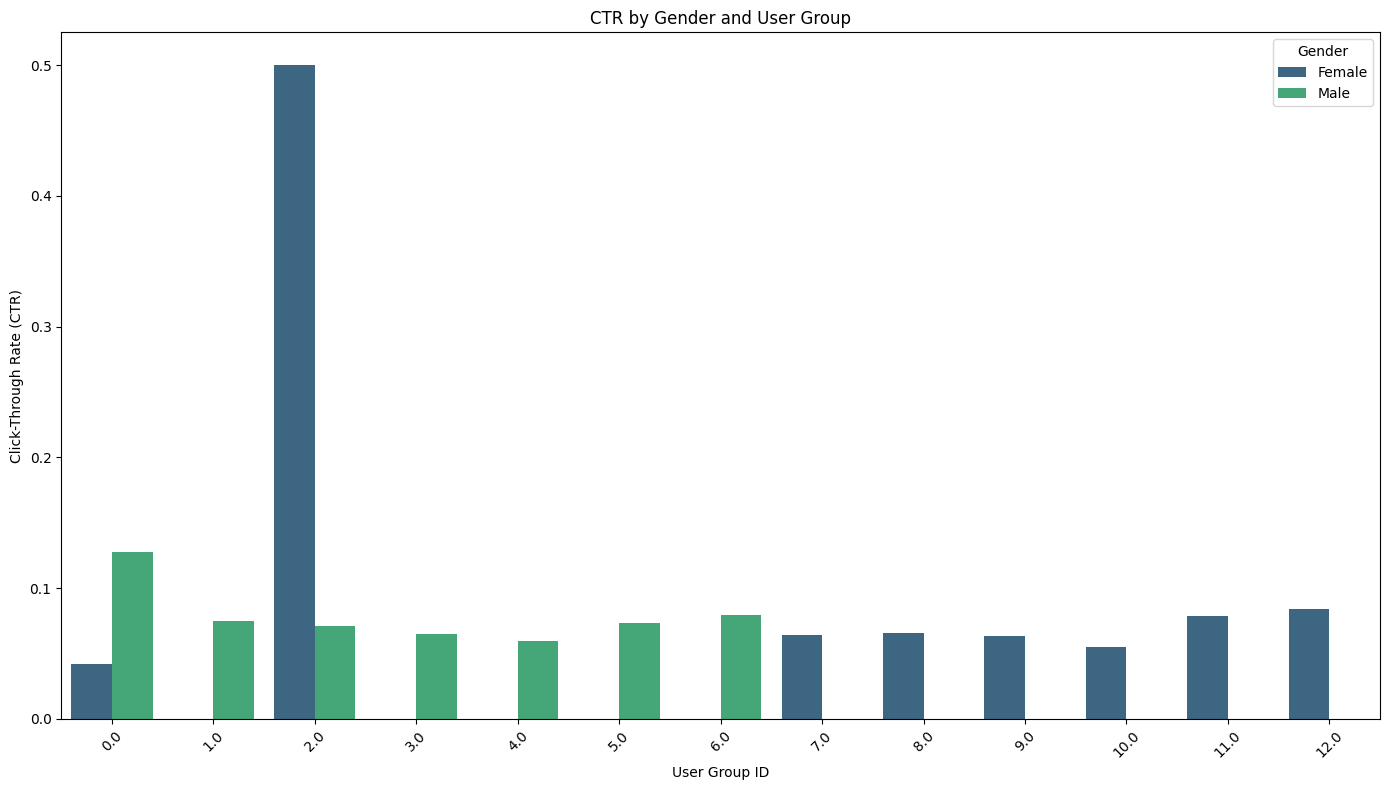

In [40]:
# Group by gender and user_group_id and calculate total clicks, sessions, and CTR
ctr_by_gender_user_group = df_cleaned.groupby(['gender', 'user_group_id']).agg(
    total_clicks=('is_click', 'sum'),
    total_sessions=('is_click', 'count')
)
ctr_by_gender_user_group['CTR'] = ctr_by_gender_user_group['total_clicks'] / ctr_by_gender_user_group['total_sessions']

# Reset index for visualization
ctr_by_gender_user_group.reset_index(inplace=True)

# Print results
print(ctr_by_gender_user_group)

# Plot CTR for gender and user_group_id combinations
plt.figure(figsize=(14, 8))
sns.barplot(data=ctr_by_gender_user_group, x='user_group_id', y='CTR', hue='gender', palette='viridis')
plt.title('CTR by Gender and User Group')
plt.ylabel('Click-Through Rate (CTR)')
plt.xlabel('User Group ID')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

user_group_id      0.0        1.0        2.0        3.0        4.0       5.0   \
gender                                                                          
Female         0.056139   0.000000   0.009357   0.018713   0.004678  0.002339   
Male           0.030041  10.170145  34.571014  37.316549  12.148451  5.332030   

user_group_id      6.0       7.0        8.0        9.0        10.0       11.0  \
gender                                                                          
Female         0.002339  2.795256  12.053519  39.114875  26.696452  17.208954   
Male           0.431770  0.000000   0.000000   0.000000   0.000000   0.000000   

user_group_id      12.0  
gender                   
Female         2.037379  
Male           0.000000  


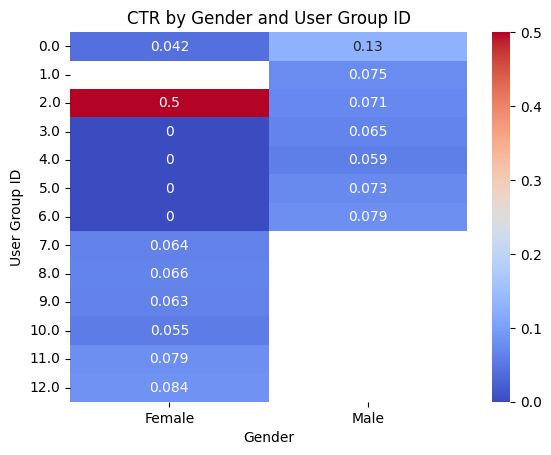

In [41]:
interaction_table = pd.crosstab(df_cleaned['gender'], df_cleaned['user_group_id'], normalize='index') * 100
print(interaction_table)

interaction_ctr = df_cleaned.groupby(['gender', 'user_group_id']).agg(
    total_clicks=('is_click', 'sum'),
    total_sessions=('is_click', 'count')
)
interaction_ctr['CTR'] = interaction_ctr['total_clicks'] / interaction_ctr['total_sessions']

interaction_pivot = interaction_ctr.reset_index().pivot(
    index='user_group_id',
    columns='gender',
    values='CTR'
)

sns.heatmap(interaction_pivot, annot=True, cmap='coolwarm')
plt.title('CTR by Gender and User Group ID')
plt.xlabel('Gender')
plt.ylabel('User Group ID')
plt.show()


In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a formula for CTR based on gender and user_group_id
model = ols('is_click ~ C(gender) * C(user_group_id)', data=df_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                  sum_sq        df          F        PR(>F)
C(gender)                            NaN       1.0        NaN           NaN
C(user_group_id)               16.472201      12.0  21.794580  6.803354e-22
C(gender):C(user_group_id)      2.195654      12.0   2.905098  7.825431e-03
Residual                    24076.115399  382265.0        NaN           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 6
  warnings.warn('covariance of constraints does not have full '


In [43]:
print(df_cleaned.groupby(['gender', 'user_group_id']).size())

gender  user_group_id
Female  0.0                  24
        2.0                   4
        3.0                   8
        4.0                   2
        5.0                   1
        6.0                   1
        7.0                1195
        8.0                5153
        9.0               16722
        10.0              11413
        11.0               7357
        12.0                871
Male    0.0                 102
        1.0               34531
        2.0              117380
        3.0              126702
        4.0               41248
        5.0               18104
        6.0                1466
dtype: int64


In [48]:
filtered_data = df_cleaned.groupby(['gender', 'user_group_id']).filter(lambda x: len(x) > 10)
model = ols('is_click ~ C(gender) * C(user_group_id)', data=filtered_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                  sum_sq        df         F   PR(>F)
C(gender)                            NaN       1.0       NaN      NaN
C(user_group_id)                0.000025      12.0  0.000033  1.00000
C(gender):C(user_group_id)      1.458109      12.0  1.929258  0.16484
Residual                    24075.233470  382254.0       NaN      NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 6
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [45]:
interaction_effects = filtered_data.groupby(['gender', 'user_group_id'])['CTR'].mean()
print(interaction_effects)

gender  user_group_id
Female  0.0              1.600262e-07
        7.0              1.360270e-06
        8.0              1.169838e-06
        9.0              1.006336e-06
        10.0             5.601760e-07
        11.0             1.356455e-06
        12.0             9.254370e-07
Male    0.0              5.404974e-07
        1.0              1.363991e-06
        2.0              1.261158e-06
        3.0              7.085509e-07
        4.0              7.145206e-07
        5.0              4.893106e-06
        6.0              1.787520e-06
Name: CTR, dtype: float64


Proportions:
Male users dominate the dataset: ~88% of sessions.
Males exhibit a slightly higher average CTR (6.8%) compared to females (6.4%).

CTR:
User group ID 2 displays an unusually high CTR among females,
User group ID 1 displays slightly high CTR among males

Conclusion:
Gender plays a significant role in CTR variations.
